In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
import os
from pathlib import Path
import glob
import h5py

In [2]:
# Add project root directory to make imports possible
project_root = Path("/mnt/c/Users/tokiw/workspace/LensingSSC")
sys.path.append(str(project_root))

In [3]:
from lensing_ssc.utils.io import load_results_from_hdf5
from lensing_ssc.core.fibonacci.fibonacci import FibonacciGrid
from lensing_ssc.core.fibonacci.optimizer import PatchOptimizer
from lensing_ssc.core.fibonacci.plotting import plot_coverage_map, plot_fibonacci_grid
from lensing_ssc.core.fibonacci.coverage import CoverageAnalyzer

In [4]:
# Jupyter plotting settings
import seaborn as sns
import matplotlib as mpl

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 5]

In [5]:
# Parameter settings
nside = 512  # Healpix resolution (in actual analysis, 1024 is used, but set to lower resolution for faster display)
patch_size = 10  # Patch size (degrees)
Ninit = 265  # Upper limit of initial patch count

# Directory to save results
results_dir = project_root / "output" 
savedir = "/mnt/c/Users/tokiw/workspace/LensingSSC/output/figures"
os.makedirs(results_dir, exist_ok=True)


In [6]:
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=67.74, Om0=0.309)
sboxsize = 625
bboxsize = 5000

# Configuration

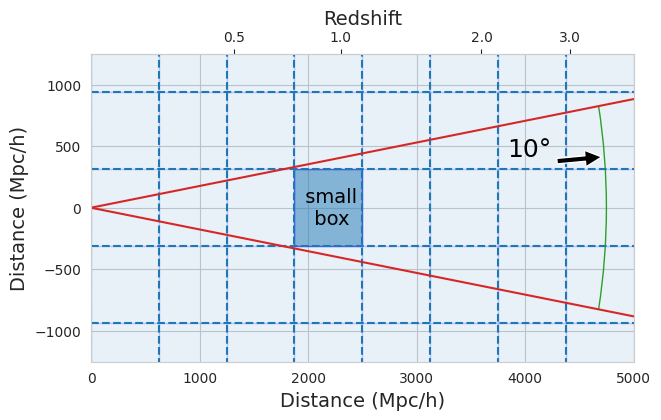

In [7]:
from matplotlib.patches import Arc  

# Parameters
replications = bboxsize // sboxsize

# Convert opening angle to radians
opening_angle_rad = np.deg2rad(patch_size)

# Calculate the extent of the light cone in x and y directions
extent = bboxsize * np.tan(opening_angle_rad)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 4))

# Draw the replicated boxes
for i in range(replications):
    ax.vlines(x=i * sboxsize, ymin=-bboxsize / 2, ymax=bboxsize / 2, color='tab:blue', linestyle='--')

for i in range(4):
    ax.hlines(y=(i+0.5) * sboxsize, xmin=0, xmax=bboxsize, color='tab:blue', linestyle='--')
    ax.hlines(y=-(i+0.5) * sboxsize, xmin=0, xmax=bboxsize, color='tab:blue', linestyle='--')

for i in range(replications):
    for j in range(4):
        rect = plt.Rectangle((i * sboxsize, -sboxsize/2 + j * sboxsize), sboxsize, sboxsize, edgecolor='blue', linestyle='-', fill=True, alpha=0.1)
        ax.add_patch(rect)
        if j != 0:
            rect = plt.Rectangle((i * sboxsize, -sboxsize/2 - j * sboxsize), sboxsize, sboxsize, edgecolor='blue', linestyle='-', fill=True, alpha=0.1)
            ax.add_patch(rect)

rect = plt.Rectangle((3 * sboxsize, -sboxsize/2), sboxsize, sboxsize, edgecolor='blue', linestyle='-', fill=True, alpha=0.5)
ax.add_patch(rect)
ax.text(3 * sboxsize + sboxsize/2, 0, ' small\n box', fontsize=14, color='black', ha='center', va='center')
    
# Draw the light cone
x_coords = [0, bboxsize]
y_coords = [0, extent]
ax.plot(x_coords, y_coords, color='tab:red')

x_coords = [0, bboxsize]
y_coords = [0, -extent]
ax.plot(x_coords, y_coords, color='tab:red')

# Add the opening angle arc
arc = Arc((0, 0), width=bboxsize*1.9, height=1.9*bboxsize, angle=0,
        theta1=-patch_size, theta2=patch_size, color='tab:green')
ax.add_patch(arc)

# Add the opening angle annotation
arc_radius = bboxsize*0.95
arc_x = arc_radius * np.cos(opening_angle_rad / 2)
arc_y = arc_radius * np.sin(opening_angle_rad / 2)
ax.annotate(f'{patch_size}°',
            xy=(arc_x, arc_y),
            xytext=(arc_x - 900, arc_y - 0),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=18,
            color='black')

# Set limits and labels
ax.set_xlim(0, bboxsize)
ax.set_ylim(-bboxsize / 4, bboxsize / 4)
ax.set_xlabel('Distance (Mpc/h)', fontsize=14)
ax.set_ylabel('Distance (Mpc/h)', fontsize=14)
#ax.set_title('Concept Figure of a Light Cone Configuration')


# Create a secondary x-axis for redshift
secax = ax.secondary_xaxis('top')
secax.set_xlabel('Redshift', fontsize=14)
redshift_ticks = [0.5, 1.0, 2.0, 3.0]
distance_ticks = [cosmo.comoving_distance(z).value * cosmo.h for z in redshift_ticks]
secax.set_xticks(distance_ticks)
secax.set_xticklabels(redshift_ticks)

# save the figure
plt.savefig(f'{savedir}/light_cone_configuration.pdf', bbox_inches='tight')

# Fibonacci

Testing feasibility for N = 133 ...
N = 133 is feasible; trying larger values.
Testing feasibility for N = 201 ...
N = 201 is feasible; trying larger values.
Testing feasibility for N = 235 ...
N = 235 is feasible; trying larger values.
Testing feasibility for N = 251 ...
N = 251 is feasible; trying larger values.
Testing feasibility for N = 259 ...
N = 259 is feasible; trying larger values.
Testing feasibility for N = 263 ...
N = 263 is feasible; trying larger values.
Testing feasibility for N = 265 ...
N = 265 is feasible; trying larger values.
Optimal number of patches: 265


/tmp/ipykernel_1843/3882011151.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


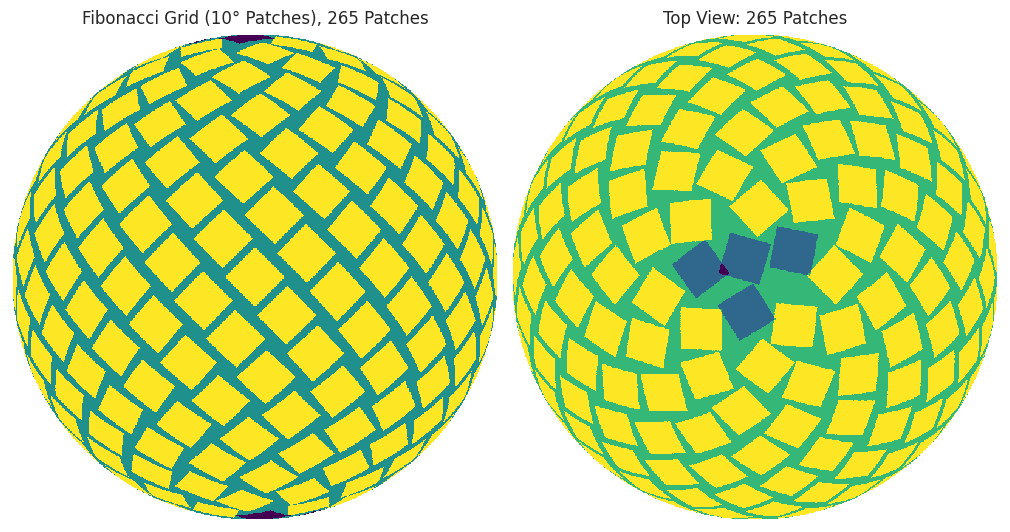

In [8]:
# Create optimizer
optimizer = PatchOptimizer(nside=nside, patch_size=patch_size, Ninit=Ninit)

N_opt = optimizer.optimize(verbose=True) 

# Calculate optimal number of patches (verbose=True to show progress)
#N_opt = FibonacciGrid.load_or_generate_points(patch_size, None).shape[0]
print(f"Optimal number of patches: {N_opt}")

# Visualize basic Fibonacci grid
fig, pixels = plot_fibonacci_grid(optimizer, n=N_opt)
#plt.suptitle(f"Basic Fibonacci Grid (Patch size: {patch_size}°, Optimal patches: {N_opt})", fontsize=16)
plt.tight_layout()
plt.savefig(f'{savedir}/basic_fibonacci_grid_{patch_size}deg.png', bbox_inches='tight')
plt.show()

In [9]:
# Create coverage maps for each scenario
points = FibonacciGrid.fibonacci_grid_on_sphere(N_opt)

# Scenario 1: Exclude patches near the poles
mask1 = CoverageAnalyzer.build_mask_first_scenario(points, optimizer)
valid_points1 = points[~mask1]
invalid_points1 = points[mask1]

# Scenario 2: More complex masking condition
mask2 = CoverageAnalyzer.build_mask_second_scenario(points, optimizer)
valid_points2 = points[~mask2]
invalid_points2 = points[mask2]

# Create coverage maps
npix = hp.nside2npix(optimizer.nside)
coverage_map1 = np.zeros(npix, dtype=int)
coverage_map2 = np.zeros(npix, dtype=int)

# Fill coverage maps
CoverageAnalyzer.fill_coverage_map(valid_points1, invalid_points1, optimizer, coverage_map1)
CoverageAnalyzer.fill_coverage_map(valid_points2, invalid_points2, optimizer, coverage_map2)

# Calculate coverage statistics
coverage_fraction1 = CoverageAnalyzer.compute_coverage_stats(coverage_map1)
coverage_fraction2 = CoverageAnalyzer.compute_coverage_stats(coverage_map2)

print(f"Coverage rate for Scenario 1: {coverage_fraction1:.2%}")
print(f"Coverage rate for Scenario 2: {coverage_fraction2:.2%}")

Coverage rate for Scenario 1: 62.46%
Coverage rate for Scenario 2: 45.21%


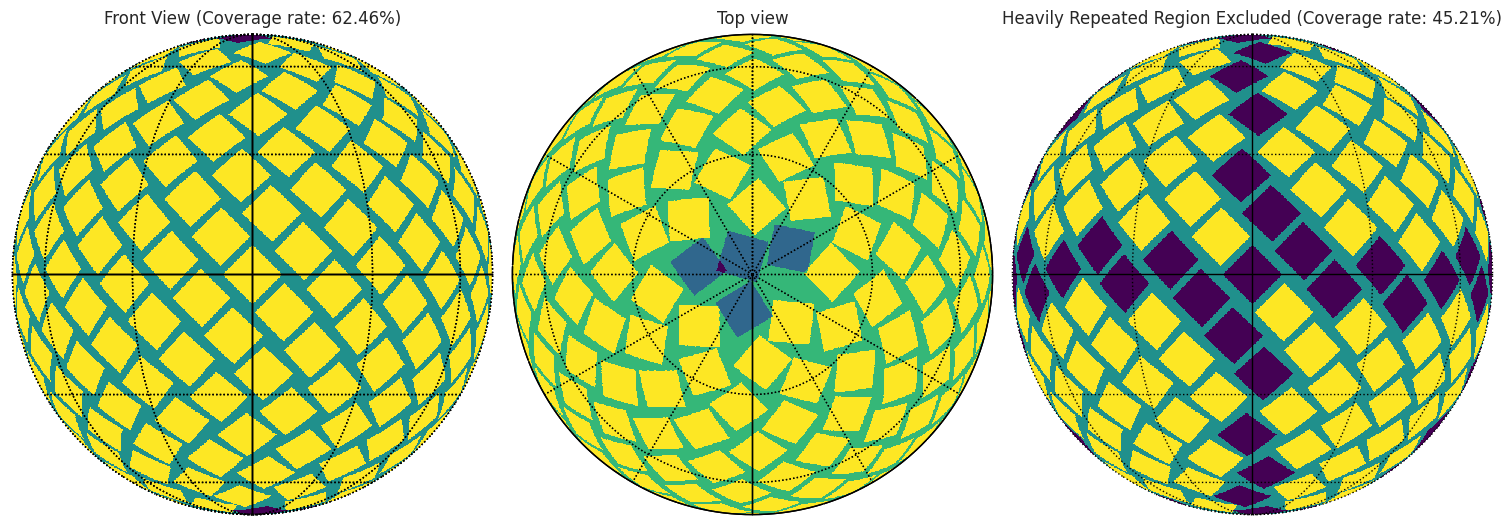

In [10]:
fig = plt.figure(figsize=(15, 5))

# Front View
plot_coverage_map(coverage_map1, f"Front View (Coverage rate: {coverage_fraction1:.2%})", (1, 3, 1))
plot_coverage_map(coverage_map1, f"Top view", (1, 3, 2), rot=(0, 90, 0))
plot_coverage_map(coverage_map2, f"Heavily Repeated Region Excluded (Coverage rate: {coverage_fraction2:.2%})", (1, 3, 3))

fig.savefig(f"{savedir}/coverage_maps_{patch_size}deg.pdf", bbox_inches='tight')

plt.show()